In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
#load datasets
df1 = pd.read_csv('HDIPercentD.csv')
df2 = pd.read_csv('IsocodesMergedClean.csv')
df3 = pd.read_csv('GDPPercentD.csv')
df4 = pd.read_csv('GenderPercentD.csv')
df5 = pd.read_csv('PopulationData1.csv')

In [3]:
#rename GDP column and remove not used columns
df3 = df3[['Country Name', '2020']]
df3.columns = ['GDP per Capita ($)' if x=='2020' else x for x in df3.columns]
df3.head()

,Country Name,GDP per Capita ($)
0,Albania,13632.186540
1,Algeria,11323.312220
2,Angola,6478.332182
3,Antigua and Barbuda,18240.380410
4,Argentina,20769.032380


In [4]:
#rename population column and remove not used columns
df5 = df5[['Alpha-3 code', 'YR2021']]
df5.columns = ['Population' if x=='YR2021' else x for x in df5.columns]
df5.head()

,Alpha-3 code,Population
0,ZWE,15092171
1,ZMB,18920657
2,YEM,30490639
3,PSE,4922749
4,VIR,105870


In [5]:
#rename columns
df2.columns = ["Women's FIFA Ranking Points" if x=='Womens Points' else x for x in df2.columns]
df2.columns = ["Men's FIFA Ranking Points" if x=='Mens Points' else x for x in df2.columns]
df2.head()

,Country Name,Men's FIFA Ranking Points,Women's FIFA Ranking Points,Alpha-3 code,Percentage Difference
0,Albania,1361.81,1346.01,ALB,1.160221
1,Algeria,1480.59,1288.27,DZA,12.989416
2,American Samoa,900.27,1030.00,ASM,-14.410121
3,Andorra,1028.70,751.46,AND,26.950520
4,Angola,1149.08,1041.91,AGO,9.326592


In [6]:
#remove not used columns
df4 = df4[['Country Name', 'Gender Inequality Index']]
df4.head()

,Country Name,Gender Inequality Index
0,Albania,0.144
1,Algeria,0.499
2,Angola,0.537
3,Argentina,0.287
4,Armenia,0.216


In [7]:
#rename HDI column and remove not used columns
df1 = df1[['Country Name', 'Value']]
df1.columns = ['HDI' if x=='Value' else x for x in df1.columns]
df1.head()

,Country Name,HDI
0,Albania,0.796
1,Algeria,0.745
2,Andorra,0.858
3,Angola,0.586
4,Antigua and Barbuda,0.788


In [8]:
#merge datasets
df1 = pd.merge(df1,df3, on = 'Country Name')
df1.head()

,Country Name,HDI,GDP per Capita ($)
0,Albania,0.796,13632.186540
1,Algeria,0.745,11323.312220
2,Angola,0.586,6478.332182
3,Antigua and Barbuda,0.788,18240.380410
4,Argentina,0.842,20769.032380


In [9]:
#merge datasets
df2 = pd.merge(df2,df5, on = 'Alpha-3 code')
df2.head()

,Country Name,Men's FIFA Ranking Points,Women's FIFA Ranking Points,Alpha-3 code,Percentage Difference,Population
0,Albania,1361.81,1346.01,ALB,1.160221,2811666
1,Algeria,1480.59,1288.27,DZA,12.989416,44616626
2,American Samoa,900.27,1030.00,ASM,-14.410121,55103
3,Andorra,1028.70,751.46,AND,26.950520,77354
4,Angola,1149.08,1041.91,AGO,9.326592,33933611


In [10]:
#merge datasets
df3 = pd.merge(df1,df4, on = 'Country Name')
df3.head()

,Country Name,HDI,GDP per Capita ($),Gender Inequality Index
0,Albania,0.796,13632.186540,0.144
1,Algeria,0.745,11323.312220,0.499
2,Angola,0.586,6478.332182,0.537
3,Argentina,0.842,20769.032380,0.287
4,Armenia,0.759,13311.028140,0.216


In [11]:
#complete merging of datasets
df = pd.merge(df2,df3, on = 'Country Name')
df.head()

,Country Name,Men's FIFA Ranking Points,Women's FIFA Ranking Points,Alpha-3 code,Percentage Difference,Population,HDI,GDP per Capita ($),Gender Inequality Index
0,Albania,1361.81,1346.01,ALB,1.160221,2811666,0.796,13632.186540,0.144
1,Algeria,1480.59,1288.27,DZA,12.989416,44616626,0.745,11323.312220,0.499
2,Angola,1149.08,1041.91,AGO,9.326592,33933611,0.586,6478.332182,0.537
3,Argentina,1770.65,1660.37,ARG,6.228221,45808747,0.842,20769.032380,0.287
4,Armenia,1242.42,1072.97,ARM,13.638705,2968128,0.759,13311.028140,0.216


In [12]:
#remove ALpha code column
df = df.drop('Alpha-3 code', axis=1)
df.head()

,Country Name,Men's FIFA Ranking Points,Women's FIFA Ranking Points,Percentage Difference,Population,HDI,GDP per Capita ($),Gender Inequality Index
0,Albania,1361.81,1346.01,1.160221,2811666,0.796,13632.186540,0.144
1,Algeria,1480.59,1288.27,12.989416,44616626,0.745,11323.312220,0.499
2,Angola,1149.08,1041.91,9.326592,33933611,0.586,6478.332182,0.537
3,Argentina,1770.65,1660.37,6.228221,45808747,0.842,20769.032380,0.287
4,Armenia,1242.42,1072.97,13.638705,2968128,0.759,13311.028140,0.216


In [13]:
#check shape
df.shape

(147, 8)

In [14]:
#download csv
df.to_csv('Anomalies1.csv, index = False')

In [15]:
#set params
params = list(df.columns)

print(params)


['Country Name', "Men's FIFA Ranking Points", "Women's FIFA Ranking Points", 'Percentage Difference', 'Population', 'HDI', 'GDP per Capita ($)', 'Gender Inequality Index']


In [16]:
#remove Country Name from params
params = params[1:]

print(params)

["Men's FIFA Ranking Points", "Women's FIFA Ranking Points", 'Percentage Difference', 'Population', 'HDI', 'GDP per Capita ($)', 'Gender Inequality Index']


In [17]:
#isolate specific country
Country = df.loc[df['Country Name']== 'Brazil'].reset_index()

Country = list(Country.loc[0])
Country = Country[2: ]

In [18]:
#check data
print(Country)

[1837.56, 1975.82, -7.524108056, 213993441, 0.754, 14834.1937, 0.39]


In [19]:
#check length of params
print(len(params)),(len(Country))

7


(None, 7)

In [20]:
#check params
print(params)

["Men's FIFA Ranking Points", "Women's FIFA Ranking Points", 'Percentage Difference', 'Population', 'HDI', 'GDP per Capita ($)', 'Gender Inequality Index']


In [21]:
#import maths package
from scipy import stats 
import math

In [22]:
#calculate percentile ranks for specific country within dataset
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],Country[x])))

In [23]:
#check values
print(values)

[100, 95, 39, 97, 53, 55, 56]


In [24]:
#import mplsoccer package for vizualisation
from mplsoccer import PyPizza, add_image, FontManager

Text(0.515, 0.942, 'Percentile Rank in various indicators')

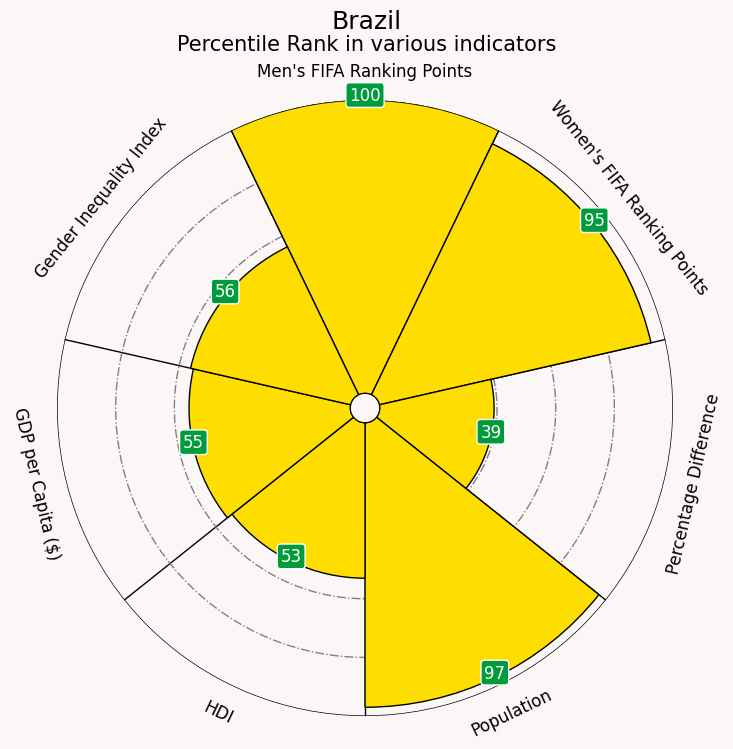

In [25]:
#load mpl soccer specification
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color= '#fcf7f7',    # set background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#FEDD00", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
         va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
         zorder=3,
        bbox=dict(
            edgecolor="white", facecolor="#009c3b",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Brazil", size=18,
    ha="center" , color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank in various indicators",
    size=15,
    ha="center", color="#000000"
)


In [26]:
#save as image
fig.savefig('BrazilPizzaChart.png', dpi = 1000)